# Summary

## Motivation
The purpose of this project was to explore how nutrition changes from season to season, while also honing my SQL, pandas and matplotlib skills. Food and nutrition has always interested me, so I decided to use Epicurious.com's recipes to analyze how recipes of various categories stack up against each other in terms of calories, carbohydrates, protein, fat, and sodium.

## Project Overview
In this project, to get data I searched kaggle and found a great nutrition dataset from Epicurious.com. My analysis toolkit included Jupyter notebook and the following Python packages: pandas, matplotlib, and sqlite3 (write SQL queries against my data set). 

## Conclusions
- Not every holiday features recipes that are tyically less healthy than the overall average
- Interestingly, Cinco de mayo and Fourth of July recipes are typically lower calorie and lower fat than both the overall average and other holidays. This could be due to the fact that the weather is warmer during these times of year and food may be lighter because people are out exercising
- Mardi Gras was the holiday with the most consistently unhealthy recipes, with the highest nutrition averages in 4 of the 5 categories. Mardi Gras might be one of the most difficult holidays to get through while adhering to a specific diet

### Holidays to be most cautious around by type of diet:

#### low- cal -> Christmas, Easter, and Mardi Gras 
#### low- carb -> Christmas and Thanksgiving
#### low- fat -> Christmas, Easter, and Mardi Gras
#### high- protein -> Cinco de Mayo and Fourth of July
#### low- sodium -> Mardi Gras

In [2]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

## Import CSV with information from the Epicurious.com

In [3]:
df = pd.read_csv('epi_r.csv', encoding = 'ISO-8859-1', index_col=[0])
df.columns = df.columns.str.replace(" ","_")

## Set up SQL database in python and convert dataframe to SQL table

In [4]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

In [ ]:
df.to_sql("epi_recipes", conn)

## Use SQL to return Dataframe with specific holidays, nutrition facts columns. Omit recipes with null nutrition facts and incorrect information (calories < 4000)

In [40]:
c.execute(""" SELECT fourth_of_july, thanksgiving, christmas, mardi_gras, easter, cinco_de_mayo, calories, (calories - ((fat * 9) + (protein * 4)))/ 4 AS 'carbohydrates', fat, protein, sodium 
FROM epi_recipes
WHERE calories IS NOT NULL AND protein IS NOT NULL AND fat IS NOT NULL AND sodium IS NOT NULL AND calories < 4000;""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,fourth_of_july,thanksgiving,christmas,mardi_gras,easter,cinco_de_mayo,calories,carbohydrates,fat,protein,sodium
0,0.0,0.0,0.0,0.0,0.0,0.0,426.0,60.75,7.0,30.0,559.0
1,0.0,0.0,0.0,0.0,0.0,0.0,403.0,31.00,23.0,18.0,1439.0
2,0.0,0.0,0.0,0.0,0.0,0.0,165.0,19.50,7.0,6.0,165.0
3,0.0,0.0,0.0,0.0,0.0,0.0,547.0,44.75,32.0,20.0,452.0
4,0.0,0.0,0.0,0.0,0.0,0.0,948.0,40.25,79.0,19.0,1042.0
...,...,...,...,...,...,...,...,...,...,...,...
15745,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.50,2.0,2.0,64.0
15746,0.0,0.0,0.0,0.0,0.0,0.0,671.0,82.75,28.0,22.0,583.0
15747,0.0,0.0,0.0,0.0,0.0,0.0,563.0,24.25,38.0,31.0,652.0
15748,0.0,0.0,0.0,0.0,0.0,0.0,631.0,58.75,24.0,45.0,517.0


## Because the dataset is one-hot encoded, we're going to use pandas to refine our table by collapsing all the holiday columns into one 'holiday' column.

In [41]:
x = data.iloc[:, :6]
x


,fourth_of_july,thanksgiving,christmas,mardi_gras,easter,cinco_de_mayo
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
15745,0.0,0.0,0.0,0.0,0.0,0.0
15746,0.0,0.0,0.0,0.0,0.0,0.0
15747,0.0,0.0,0.0,0.0,0.0,0.0
15748,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Use .all function to collapse all columns and evaluate if it is true that each row has only zero's or not, 
# returning only the rows that have at least one non- zero. 
# This will give us recipes that are only member to a least one or more of these holidays
x.loc[~(x==0).all(axis=1)]

,fourth_of_july,thanksgiving,christmas,mardi_gras,easter,cinco_de_mayo
7,0.0,1.0,0.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,1.0,0.0
23,0.0,1.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
15709,0.0,0.0,0.0,0.0,1.0,0.0
15718,0.0,0.0,1.0,0.0,0.0,0.0
15735,0.0,1.0,0.0,0.0,0.0,0.0
15737,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
# Plug back into original dataframe
hdayrecipes = data.loc[~(x==0).all(axis=1)]
hdayrecipes

,fourth_of_july,thanksgiving,christmas,mardi_gras,easter,cinco_de_mayo,calories,carbohydrates,fat,protein,sodium
7,0.0,1.0,0.0,0.0,0.0,0.0,256.0,48.75,5.0,4.0,30.0
12,0.0,0.0,1.0,0.0,0.0,0.0,146.0,21.25,5.0,4.0,160.0
19,0.0,0.0,0.0,0.0,1.0,0.0,215.0,2.75,20.0,6.0,250.0
23,0.0,1.0,0.0,0.0,0.0,0.0,376.0,46.50,18.0,7.0,604.0
29,0.0,0.0,0.0,0.0,1.0,0.0,483.0,37.00,35.0,5.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
15709,0.0,0.0,0.0,0.0,1.0,0.0,134.0,6.75,11.0,2.0,138.0
15718,0.0,0.0,1.0,0.0,0.0,0.0,530.0,10.25,45.0,21.0,1205.0
15735,0.0,1.0,0.0,0.0,0.0,0.0,161.0,40.25,0.0,0.0,1.0
15737,0.0,1.0,0.0,0.0,0.0,0.0,235.0,19.25,10.0,17.0,422.0


In [44]:
hdayrecipes['holiday'] = hdayrecipes.iloc[:,:6].idxmax(axis=1)
hdayrecipes = hdayrecipes.iloc[:,6:]
hdayrecipes

/Users/jessewm2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,calories,carbohydrates,fat,protein,sodium,holiday
7,256.0,48.75,5.0,4.0,30.0,thanksgiving
12,146.0,21.25,5.0,4.0,160.0,christmas
19,215.0,2.75,20.0,6.0,250.0,easter
23,376.0,46.50,18.0,7.0,604.0,thanksgiving
29,483.0,37.00,35.0,5.0,100.0,easter
...,...,...,...,...,...,...
15709,134.0,6.75,11.0,2.0,138.0,easter
15718,530.0,10.25,45.0,21.0,1205.0,christmas
15735,161.0,40.25,0.0,0.0,1.0,thanksgiving
15737,235.0,19.25,10.0,17.0,422.0,thanksgiving


## Find nutrition column averages for each holiday

In [45]:
hdayavgs = hdayrecipes.groupby('holiday').mean()
hdayavgs

,calories,carbohydrates,fat,protein,sodium
holiday,,,,,
christmas,500.974265,41.719210,28.685662,18.981618,888.612132
cinco_de_mayo,307.914062,30.939453,16.375000,9.195312,784.320312
easter,590.866197,31.204225,40.528169,25.323944,776.781690
fourth_of_july,422.899254,38.423507,21.921642,17.977612,740.873134
mardi_gras,694.523810,39.047619,34.714286,56.476190,1640.976190
thanksgiving,468.173300,43.010365,22.602819,23.176617,770.189884


## Add in overall averages for Epicurious recipes at the bottom of the dataframe

In [46]:
c.execute(""" SELECT AVG(calories) as 'calories', AVG((calories - ((fat * 9) + (protein * 4)))/ 4) AS 'carbohydrates', AVG(fat) as 'fat', AVG(protein) as 'protein', AVG(sodium) as 'sodium' 
FROM epi_recipes
WHERE calories IS NOT NULL AND protein IS NOT NULL AND fat IS NOT NULL AND sodium IS NOT NULL AND calories < 4000;""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,calories,carbohydrates,fat,protein,sodium
0,458.391111,36.431984,25.813651,20.085079,673.780317


In [47]:
hdayavgs = hdayavgs.append(pd.Series(data.loc[0], index=hdayavgs.columns, name='all_epi_recipes'))
hdayavgs

,calories,carbohydrates,fat,protein,sodium
holiday,,,,,
christmas,500.974265,41.719210,28.685662,18.981618,888.612132
cinco_de_mayo,307.914062,30.939453,16.375000,9.195312,784.320312
easter,590.866197,31.204225,40.528169,25.323944,776.781690
fourth_of_july,422.899254,38.423507,21.921642,17.977612,740.873134
mardi_gras,694.523810,39.047619,34.714286,56.476190,1640.976190
thanksgiving,468.173300,43.010365,22.602819,23.176617,770.189884
all_epi_recipes,458.391111,36.431984,25.813651,20.085079,673.780317


## Use matplotlib to display data

Text(0.5, 1.0, 'holiday/all recipes by average calories per recipe')

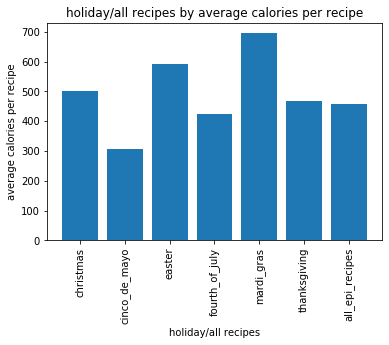

In [48]:
plt.bar(hdayavgs.index.values, hdayavgs.calories)
plt.xticks(hdayavgs.index.values, hdayavgs.index.values, rotation='vertical')
plt.xlabel('holiday/all recipes')
plt.ylabel('average calories per recipe')
plt.title('holiday/all recipes by average calories per recipe')

Text(0.5, 1.0, 'holiday/all recipes by average carbohydrates per recipe')

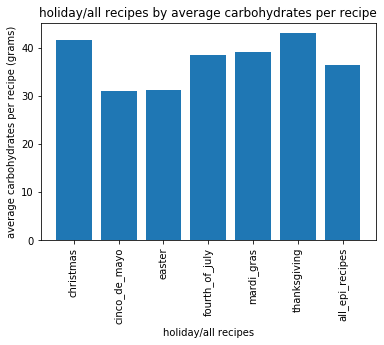

In [49]:
plt.bar(hdayavgs.index.values, hdayavgs.carbohydrates)
plt.xticks(hdayavgs.index.values, hdayavgs.index.values, rotation='vertical')
plt.xlabel('holiday/all recipes')
plt.ylabel('average carbohydrates per recipe (grams)')
plt.title('holiday/all recipes by average carbohydrates per recipe')

Text(0.5, 1.0, 'holiday/all recipes by average fat per recipe')

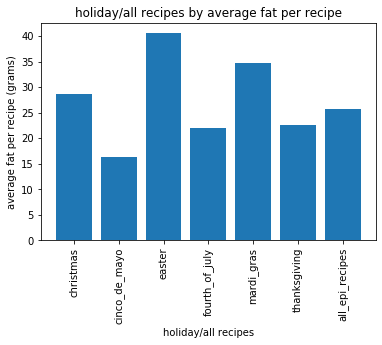

In [50]:
plt.bar(hdayavgs.index.values, hdayavgs.fat)
plt.xticks(hdayavgs.index.values, hdayavgs.index.values, rotation='vertical')
plt.xlabel('holiday/all recipes')
plt.ylabel('average fat per recipe (grams)')
plt.title('holiday/all recipes by average fat per recipe')

Text(0.5, 1.0, 'holiday/all recipes by average protein per recipe')

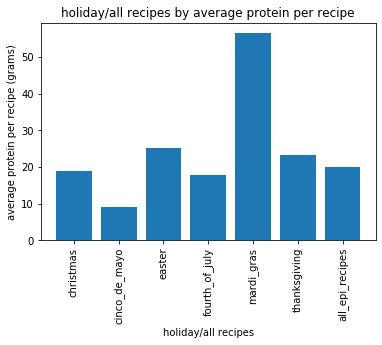

In [51]:
plt.bar(hdayavgs.index.values, hdayavgs.protein)
plt.xticks(hdayavgs.index.values, hdayavgs.index.values, rotation='vertical')
plt.xlabel('holiday/all recipes')
plt.ylabel('average protein per recipe (grams)')
plt.title('holiday/all recipes by average protein per recipe')

Text(0.5, 1.0, 'holiday/all recipes by average sodium per recipe')

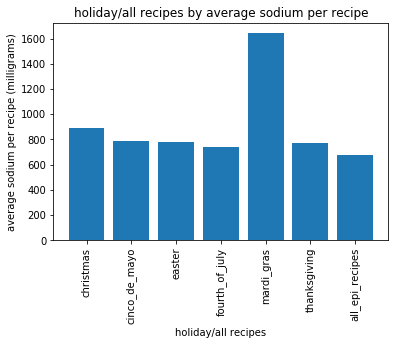

In [52]:
plt.bar(hdayavgs.index.values, hdayavgs.sodium)
plt.xticks(hdayavgs.index.values, hdayavgs.index.values, rotation='vertical')
plt.xlabel('holiday/all recipes')
plt.ylabel('average sodium per recipe (milligrams)')
plt.title('holiday/all recipes by average sodium per recipe')

## All nutrition facts in one bar graph

In [54]:
hdayavgs_ = hdayavgs.copy()
hdayavgs_.calories = hdayavgs_.calories/100
hdayavgs_.sodium = hdayavgs_.sodium/100

Text(0.5, 1.0, 'Average Nutrition facts per recipe by holiday')

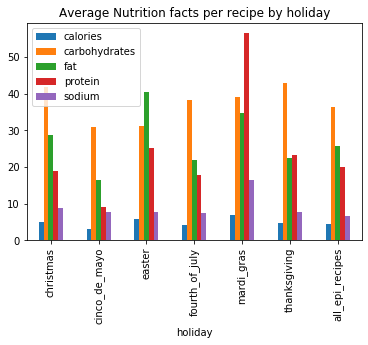

In [55]:
hdayavgs_.plot(kind = 'bar')
plt.title('Average Nutrition facts per recipe by holiday')